# EDA consolidado

In [1]:
# Importanción librerias
import sys
import os
import numpy as np
import pandas as pd
from datetime import datetime
from datetime import timedelta
import missingno as msno
import re 
import warnings
import json
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil.parser import parse
from plotly.subplots import make_subplots
import plotly.graph_objects as go
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
sns.set_style("darkgrid")

In [4]:
# read
tags=pd.read_excel("../../data/meta data/tags relevantes.xlsx")
tags_cc=tags.tag.to_list()
dic={}
for i,j in zip(tags.tag,tags.description):
    dic[i]=j

In [6]:
# Se lee csv
consolidation=pd.read_csv('../../data/consolidated data/consolidation_15December2022.csv', parse_dates=['Timestamp'], index_col='Timestamp')
consolidation.sort_index(inplace=True)
consolidation.rename(columns=dic,inplace=True)
consolidation.head()

,sag mill expert system,Limitado por Límite Alto de Tonelaje,Optimizando tonelaje,Limitado por Peso,Limitado por Corriente Bobina,Limitado por torque espesador 2,Limitado por torque espesador 3,Limitado por Potencia Bolas 1,Limitado por Potencia Bolas 2,Limitado por Pebbles,Limitado por Corriente harnero,Limitado por Potencia SAG,Limitado por limite bajo de tonelaje,Limitado por Temperatura bobina,Limitado por presión espesador 2,Limitado por presión espesador 3,pyrite law,chalcopyrite law,chalcocite law,covelin law,crusher index,sag power index,ball work index,bornite law,torque,charge cell,power,TPH,solid percentage,water,speed,solid,LL charge cell,HH charge cell,HH TPH,stator current,granulometry
Timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.499208,864.295848,23071.203516,3847.009774,65.090716,2063.724810,9.063008,65.0,820.0,900.0,4350.0,3935.520368,63.702719
2018-01-01 00:01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.410009,862.125504,23043.030173,3872.996001,65.171210,2072.257994,9.062102,65.0,820.0,900.0,4350.0,3930.839200,62.920996
2018-01-01 00:02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.261466,859.956386,22991.287211,3879.211149,65.122192,2079.820066,9.062520,65.0,820.0,900.0,4350.0,3923.503230,62.847943
2018-01-01 00:03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.115891,858.914758,22943.243462,3894.792946,65.085609,2089.536865,9.062208,65.0,820.0,900.0,4350.0,3914.689267,63.369101
2018-01-01 00:04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.054172,857.932221,22921.665087,3959.416847,65.271563,2110.715057,9.062822,65.0,820.0,900.0,4350.0,3910.292390,63.409187


In [7]:
consolidation.shape

(2475480, 37)

<AxesSubplot:>

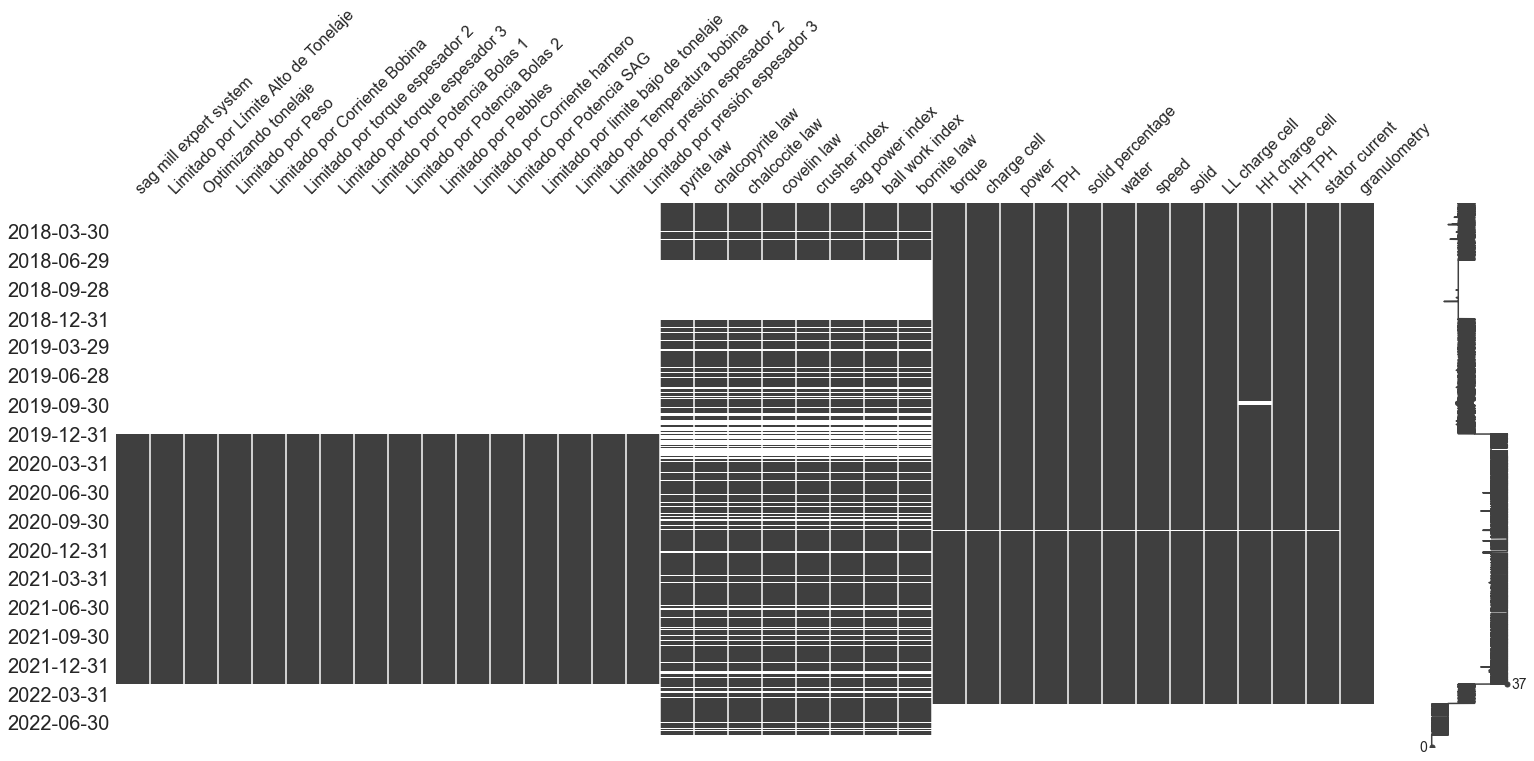

In [8]:
# Missings
msno.matrix(consolidation,freq='BQ')

**Visualización de señales en el tiempo**

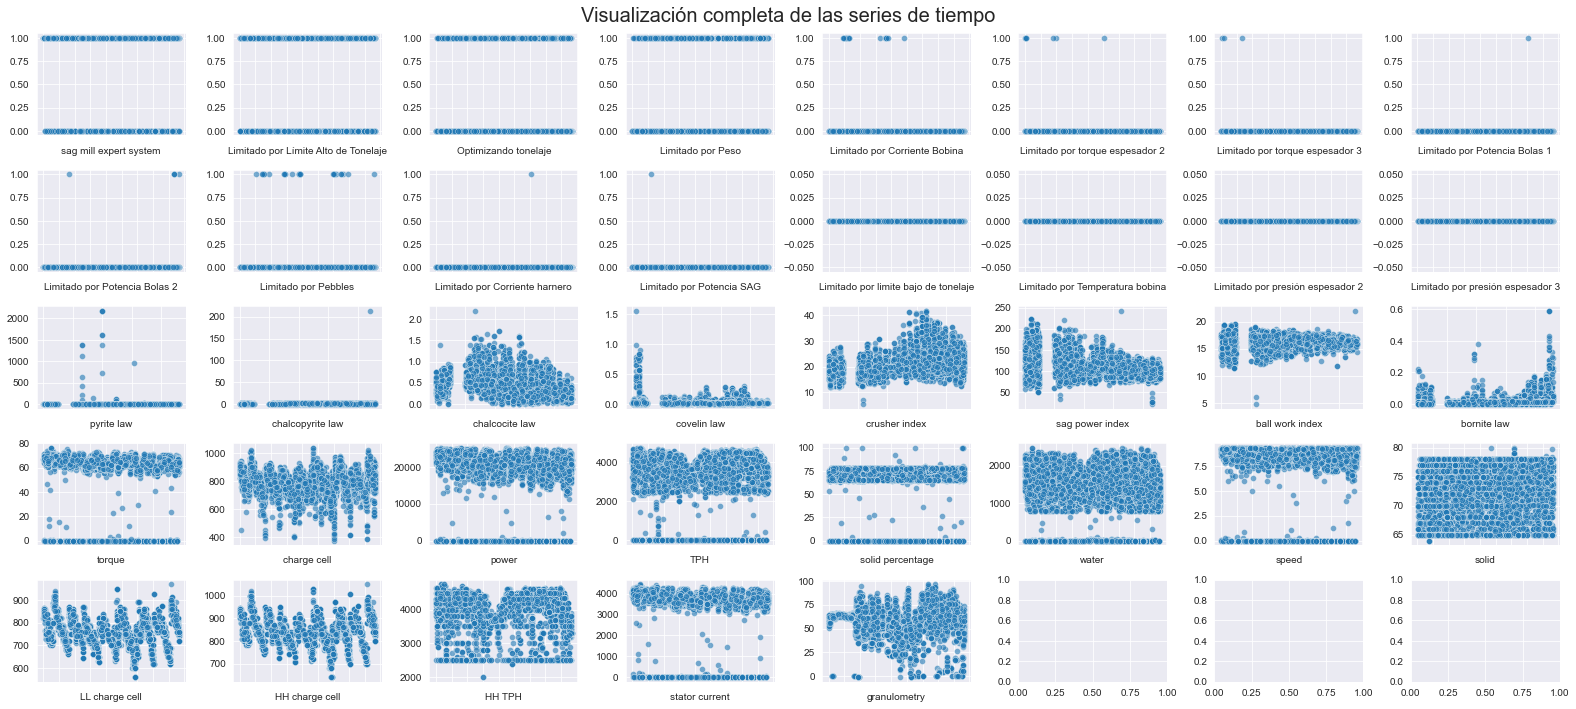

In [9]:
# Visualización completa de las series temporales

sample=consolidation.copy().sample(10000)
fig, ax = plt.subplots(5, 8, figsize=(22,10))
k = 0
for i in range(5):
    for j in range(8):
        try:
            sns.scatterplot(data=sample, x=sample.index, y=sample.columns[k], alpha=0.6, ax=ax[i, j])
            ax[i, j].set_ylabel('', fontsize = 10.0)
            ax[i, j].set_xlabel(sample.columns[k], fontsize = 10.0)
            ax[i, j].set_xticklabels('')
            k+=1
        except:
            pass
fig.suptitle('Visualización completa de las series de tiempo',size=20)
fig.tight_layout()

**Distribución de los datos**

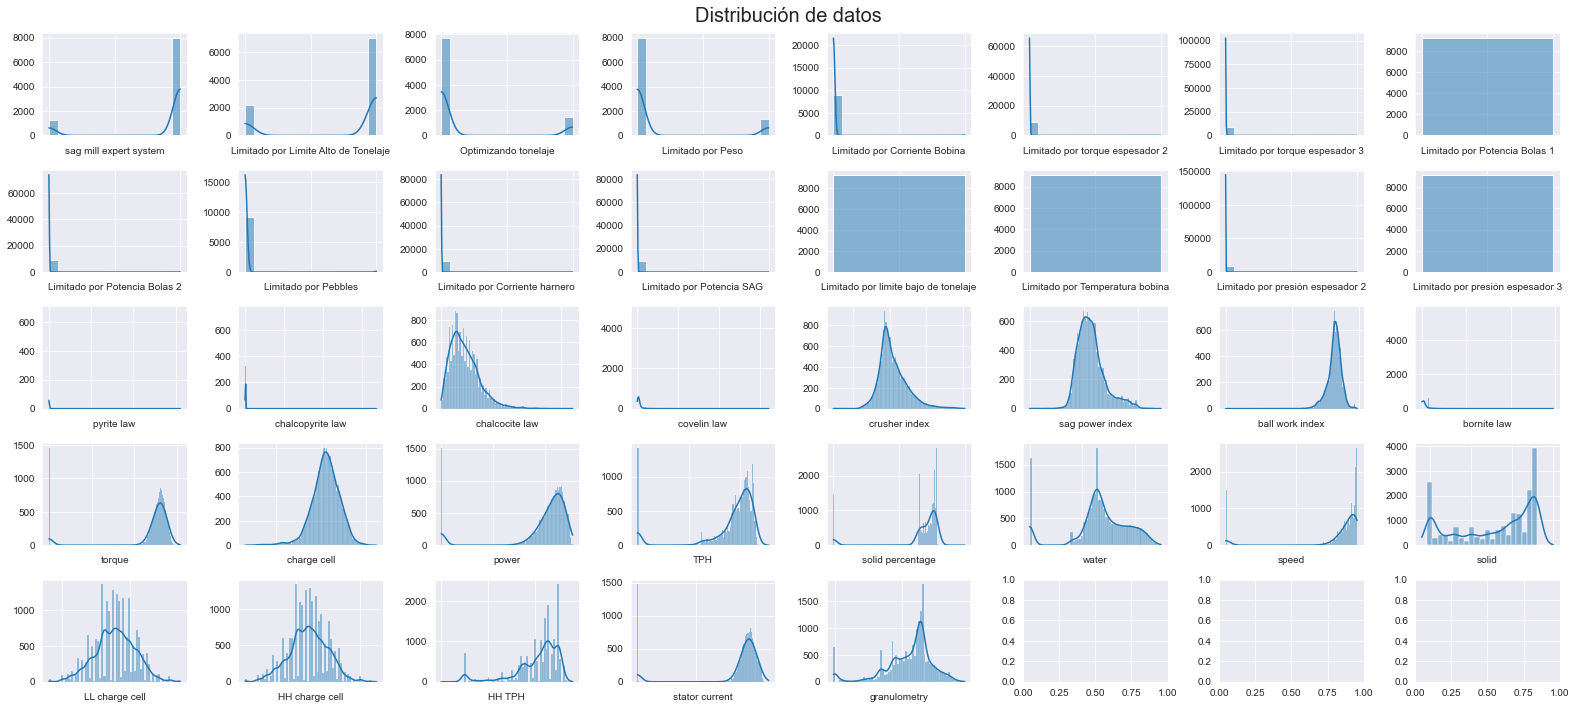

In [10]:
fig, ax = plt.subplots(5, 8, figsize=(22,10))
k = 0
for i in range(5):
    for j in range(8):
        try:
            sns.histplot(data=consolidation.sample(20000), x=consolidation.columns[k], kde=True, ax=ax[i, j])
            ax[i, j].set_ylabel('', fontsize = 10.0)
            ax[i, j].set_xlabel(consolidation.columns[k], fontsize = 10.0)
            ax[i, j].set_xticklabels('')
            k+=1
        except:
            pass
        
fig.suptitle('Distribución de datos',size=20)
fig.tight_layout()

**Subplots**

In [11]:
inicio_periodo=parse('2022-02-13 05:00:00')
fin_periodo=parse('2022-02-14 05:00:00')
data=consolidation.copy()[inicio_periodo:fin_periodo]
data.head()

,sag mill expert system,Limitado por Límite Alto de Tonelaje,Optimizando tonelaje,Limitado por Peso,Limitado por Corriente Bobina,Limitado por torque espesador 2,Limitado por torque espesador 3,Limitado por Potencia Bolas 1,Limitado por Potencia Bolas 2,Limitado por Pebbles,Limitado por Corriente harnero,Limitado por Potencia SAG,Limitado por limite bajo de tonelaje,Limitado por Temperatura bobina,Limitado por presión espesador 2,Limitado por presión espesador 3,pyrite law,chalcopyrite law,chalcocite law,covelin law,crusher index,sag power index,ball work index,bornite law,torque,charge cell,power,TPH,solid percentage,water,speed,solid,LL charge cell,HH charge cell,HH TPH,stator current,granulometry
Timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-02-13 05:00:00,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.29,1.25,0.1,0.01,23.294,90.4616,16.9825,0.01,61.127563,871.370138,21444.997434,3813.668242,76.048487,1202.189630,9.310468,76.0,860.0,940.0,3900.0,3638.331371,75.447837
2022-02-13 05:01:00,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.29,1.25,0.1,0.01,23.294,90.4616,16.9825,0.01,61.110182,871.002630,21439.286655,3776.446368,75.943272,1195.046615,9.312231,76.0,860.0,940.0,3900.0,3643.078147,72.813295
2022-02-13 05:02:00,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.29,1.25,0.1,0.01,23.294,90.4616,16.9825,0.01,61.026886,872.513665,21428.371942,3790.390963,76.034012,1194.627820,9.306422,76.0,860.0,940.0,3900.0,3635.104063,71.354281
2022-02-13 05:03:00,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.29,1.25,0.1,0.01,23.294,90.4616,16.9825,0.01,61.079909,875.056577,21451.469373,3778.287558,75.977588,1194.929335,9.312750,76.0,860.0,940.0,3900.0,3642.305742,68.500956
2022-02-13 05:04:00,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.29,1.25,0.1,0.01,23.294,90.4616,16.9825,0.01,61.552913,877.236597,21611.149831,3793.537052,76.052708,1194.406217,9.309348,76.0,860.0,940.0,3900.0,3665.109571,69.612644


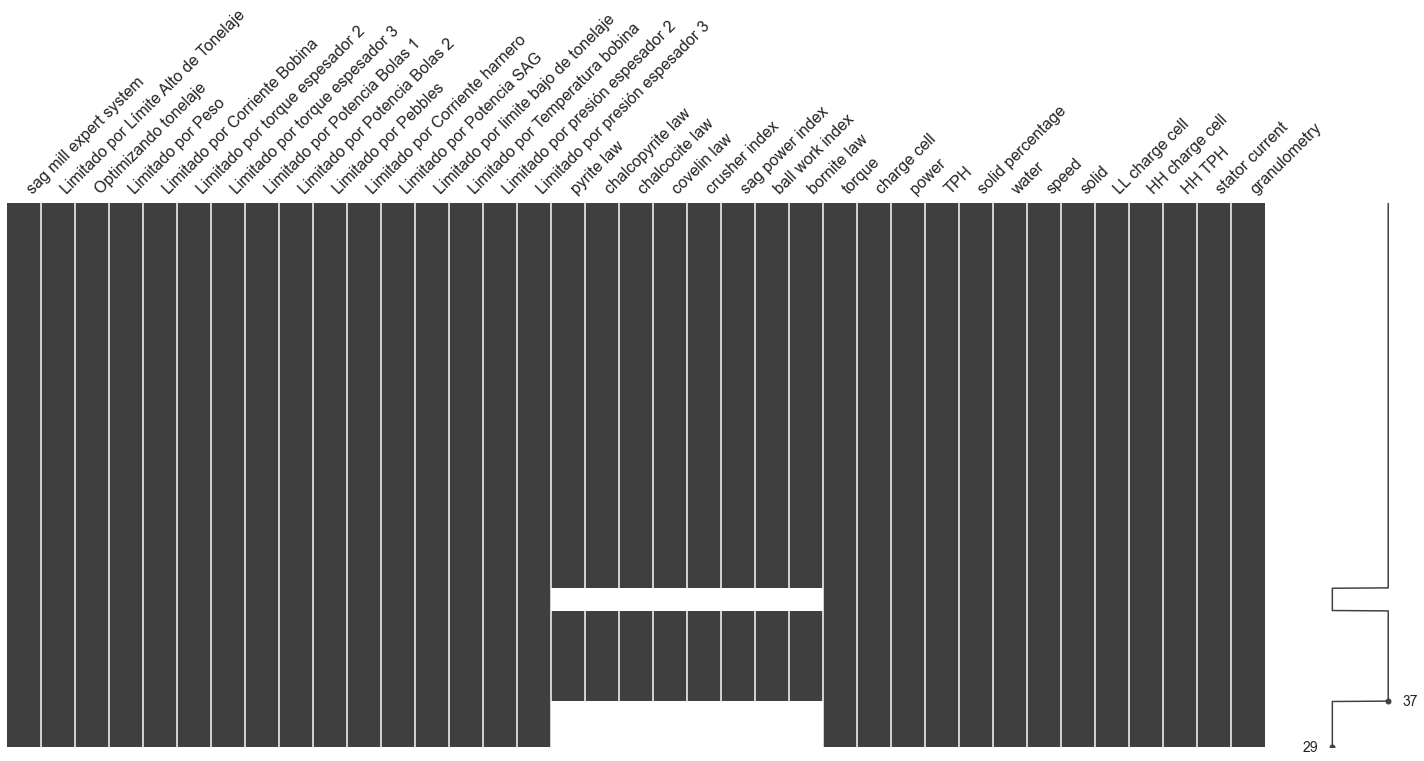

In [12]:
# Missings
msno.matrix(data,freq='BQ')
plt.show()

In [13]:
# Tags más correlacionados con tph
tags_restantes=['Limitado por Límite Alto de Tonelaje',
       'solid percentage', 'solid', 'Optimizando tonelaje', 
       'Limitado por Peso', 'stator current', 
       'sag mill expert system',  'torque',
        'power', 'Limitado por Corriente Bobina',
       'speed ', 'water']
len(tags_restantes)

12

In [14]:
titulos=tuple(["Señal de TPH y HH TPH", "Celda de carga y HH/LL celda de carga","Granulometría F80","SPI","BWI & CI","Leyes mineralógicas"]+tags_restantes)
len(titulos)

18

In [15]:
fig = make_subplots(
    rows=6, cols=3,
    subplot_titles=titulos,
    #subplot_titles=tuple("TPH y HH TPH,"),
     #shared_xaxes=True
    )


fig.add_trace(go.Scatter(x=data.index, y=data['TPH'], ##FF6511
                    mode='lines',
                    name="TPH",line=dict(width=3, ),legendgroup = '1'),row=1, col=1)  

fig.add_trace(go.Scatter(x=data.index, y=data['HH TPH'], ##FF6511
                    mode='lines',
                    name="HH TPH",line=dict(width=3, ),legendgroup = '1'),row=1, col=1)  



fig.add_trace(go.Scatter(x=data.index, y=data['charge cell'], 
                    mode='lines',
                    name="Charge cell",line=dict(width=3, ),legendgroup = '1'),row=1, col=2)  



fig.add_trace(go.Scatter(x=data.index, y=data['LL charge cell'], ##FF6511
                    mode='lines',
                    name="LL charge cell",line=dict(width=3,),legendgroup = '1'),row=1, col=2)  

fig.add_trace(go.Scatter(x=data.index, y=data['HH charge cell'], ##FF6511
                    mode='lines',
                    name="HH charge cell",line=dict(width=3,),legendgroup = '1'),row=1, col=2)  



fig.add_trace(go.Scatter(x=data.index, y=data['granulometry'], ##FF6511
                    mode='lines',
                    name='granulometry',line=dict(width=3,),legendgroup = '1'),row=1, col=3)  


fig.add_trace(go.Scatter(x=data.index, y=data['sag power index'], ##FF6511
                    mode='lines',
                    name="sag power index",line=dict(width=3, ),legendgroup = '1'),row=2, col=1)  


fig.add_trace(go.Scatter(x=data.index, y=data['ball work index'], ##FF6511
                    mode='lines',
                    name="ball work index",line=dict(width=3, ),legendgroup = '1'),row=2, col=2)  


fig.add_trace(go.Scatter(x=data.index, y=data['crusher index'], ##FF6511
                    mode='lines',
                    name="crusher index",line=dict(width=3, ),legendgroup = '1'),row=2, col=2)  


fig.add_trace(go.Scatter(x=data.index, y=data['pyrite law'], ##FF6511
                    mode='lines',
                    name="pyrite law",line=dict(width=3, ),legendgroup = '1'),row=2, col=3)  

fig.add_trace(go.Scatter(x=data.index, y=data['chalcopyrite law'], ##FF3511
                    mode='lines',
                    name="chalcopyrite law",line=dict(width=3, ),legendgroup = '1'),row=2, col=3)  

fig.add_trace(go.Scatter(x=data.index, y=data['chalcocite law'], ##FF3511
                    mode='lines',
                    name="chalcocite law",line=dict(width=3, ),legendgroup = '1'),row=2, col=3)  

fig.add_trace(go.Scatter(x=data.index, y=data['covelin law'], ##FF3511
                    mode='lines',
                    name="covelin law",line=dict(width=3, ),legendgroup = '1'),row=2, col=3)  

fig.add_trace(go.Scatter(x=data.index, y=data['bornite law'], ##FF3511
                    mode='lines',
                    name="bornite law",line=dict(width=3, ),legendgroup = '1'),row=2, col=3)  



for i in range(1,7):
   for j in range(1,4):
        fig.update_xaxes(tickformat="%H:%M",row=i, col=j)


k=0
for i in range(3,7):
   for j in range(1,4):
       try:
           fig.add_trace(go.Scatter(x=data.index, y=data[tags_restantes[k]], ##FF6511
                       mode='lines',
                       name=tags_restantes[k],line=dict(width=3, ),legendgroup = '1'),row=i, col=j) 

           k+=1
       except:
           pass
     



fig.update_layout(height=1000, width=2000, title_text="Análisis temporal de señales"#,xaxis6_rangeslider_visible=True
,#template="plotly_dark"
)

fig.show()